In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import io
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership
# functions
humedad_suelo = ctrl.Antecedent(np.arange(0, 1024, 1), 'humedad_suelo')
tiempo_riego = ctrl.Consequent(np.arange(-2, 18, 1), 'tiempo_riego')

# Auto-membership function population is possible with .automf(3, 5, or 7)
humedad_suelo['seco'] = fuzz.trimf(humedad_suelo.universe, [0, 100, 200])
humedad_suelo['semi_seco'] = fuzz.trimf(humedad_suelo.universe, [120, 310, 500])
humedad_suelo['humedo'] = fuzz.trimf(humedad_suelo.universe, [450, 572, 694])
humedad_suelo['semi_humedo'] = fuzz.trimf(humedad_suelo.universe, [658, 725, 792])
humedad_suelo['encharcado'] = fuzz.trimf(humedad_suelo.universe, [750, 825, 900])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tiempo_riego['nada'] = fuzz.trimf(tiempo_riego.universe, [-2, -1, 0])
tiempo_riego['poco'] = fuzz.trimf(tiempo_riego.universe, [0, 2 , 4])
tiempo_riego['medio'] = fuzz.trimf(tiempo_riego.universe, [3, 6, 9])
tiempo_riego['bastante'] = fuzz.trimf(tiempo_riego.universe, [7, 9, 12])
tiempo_riego['mucho'] = fuzz.trapmf(tiempo_riego.universe, [10, 13, 17, 17])

C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


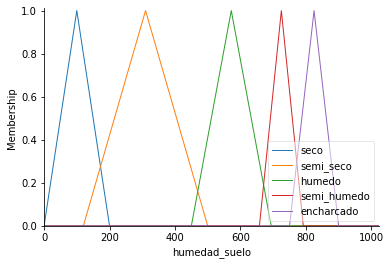

In [33]:
# You can see how these look with .view()
humedad_suelo.view()

C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


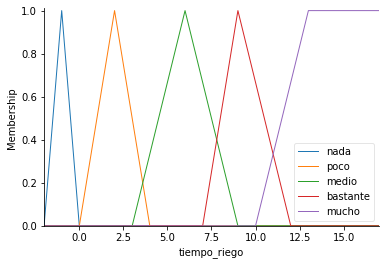

In [34]:
tiempo_riego.view()

IF humedad_suelo[encharcado] THEN tiempo_riego[nada]
	AND aggregation function : fmin
	OR aggregation function  : fmax


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

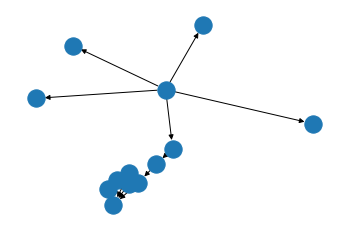

In [35]:
rule1 = ctrl.Rule(humedad_suelo['encharcado'], tiempo_riego['nada'])
rule2 = ctrl.Rule(humedad_suelo['semi_humedo'], tiempo_riego['poco'])
rule3 = ctrl.Rule(humedad_suelo['humedo'], tiempo_riego['medio'])
rule4 = ctrl.Rule(humedad_suelo['semi_seco'], tiempo_riego['bastante'])
rule5 = ctrl.Rule(humedad_suelo['seco'], tiempo_riego['mucho'])

print(rule1)

rule1.view()

## Control System Creation and Simulation.

Now that we have our rules defined, we can simply create a control system via:

In [36]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])

In order to simulate this control system, we will create a ControlSystemSimulation.
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the cafe because the inputs would be different.

In [37]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [48]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['humedad_suelo'] = 455.22

# Crunch the numbers
tipping.compute()

Once computed, we can view the result as well as visualize it.

8.814814984492834


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


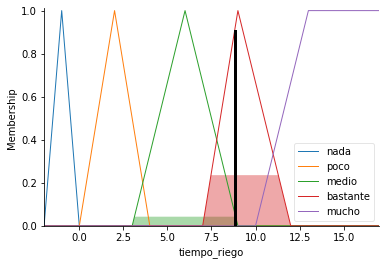

In [49]:
print (tipping.output['tiempo_riego'])
tiempo_riego.view(sim=tipping)



In [61]:
from gestion_riego.models import HistorialRiego

Fecha de Registro:  2020-12-09 17:00:20.448502
Humedad de Suelo:  371.23 Tiempo de Riego:  9.359514088229771
Fecha de Registro:  2020-12-09 12:00:20.479402
Humedad de Suelo:  364.88 Tiempo de Riego:  9.354910779071167
Fecha de Registro:  2020-12-09 08:00:20.126552
Humedad de Suelo:  367.45 Tiempo de Riego:  9.356733435427323
Fecha de Registro:  2020-12-08 17:00:20.013204
Humedad de Suelo:  359.87 Tiempo de Riego:  9.351523134241576
Fecha de Registro:  2020-12-08 12:00:20.370539
Humedad de Suelo:  357.72 Tiempo de Riego:  9.350139175972913
Fecha de Registro:  2020-12-08 08:00:19.845304
Humedad de Suelo:  363.27 Tiempo de Riego:  9.353797873130642
Fecha de Registro:  2020-12-07 17:00:19.893146
Humedad de Suelo:  362.29 Tiempo de Riego:  9.353131589446603


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\dj

Fecha de Registro:  2020-12-07 13:35:20.047688
Humedad de Suelo:  374.61 Tiempo de Riego:  9.36209732601013
Fecha de Registro:  2020-12-07 08:00:20.144016
Humedad de Suelo:  362.41 Tiempo de Riego:  9.353212717760327
Fecha de Registro:  2020-12-06 17:00:02.925904
Humedad de Suelo:  343.52 Tiempo de Riego:  9.342152281204086
Fecha de Registro:  2020-12-06 17:00:02.741813
Humedad de Suelo:  343.52 Tiempo de Riego:  9.342152281204086
Fecha de Registro:  2020-12-06 17:00:02.716908
Humedad de Suelo:  343.52 Tiempo de Riego:  9.342152281204086
Fecha de Registro:  2020-12-06 15:48:20.779904
Humedad de Suelo:  361.51 Tiempo de Riego:  9.352607389763383
Fecha de Registro:  2020-12-06 15:48:20.593585
Humedad de Suelo:  361.51 Tiempo de Riego:  9.352607389763383
Fecha de Registro:  2020-12-06 15:48:20.589586
Humedad de Suelo:  361.51 Tiempo de Riego:  9.352607389763383
Fecha de Registro:  2020-12-06 12:36:42.624996
Humedad de Suelo:  563.83 Tiempo de Riego:  6.000000000000002


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\dj

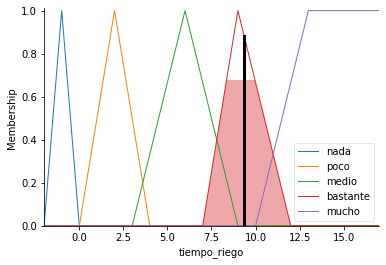

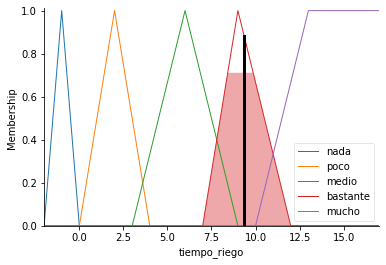

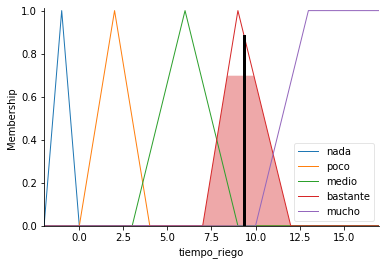

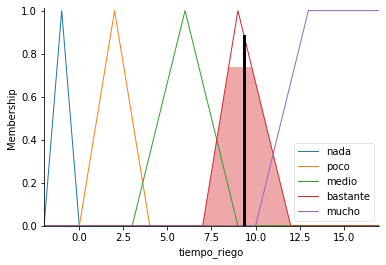

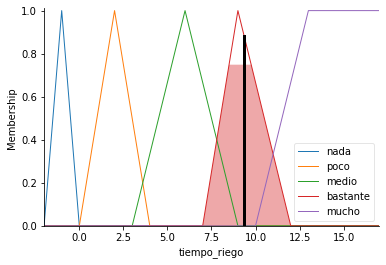

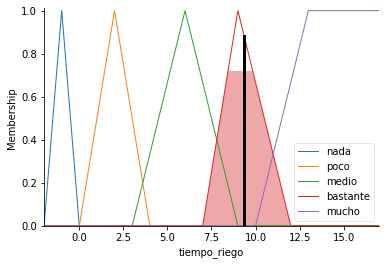

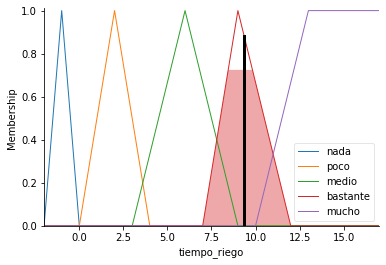

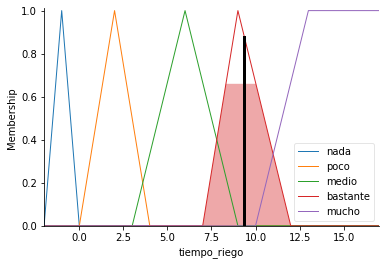

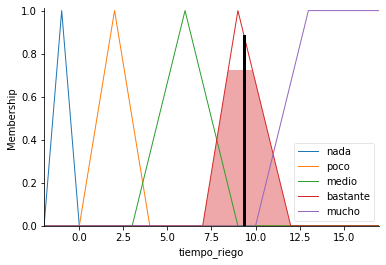

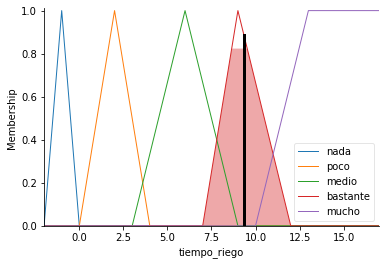

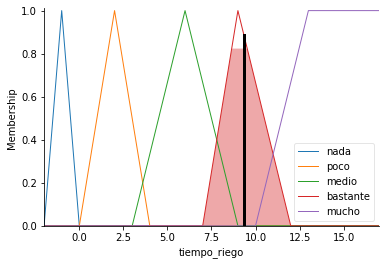

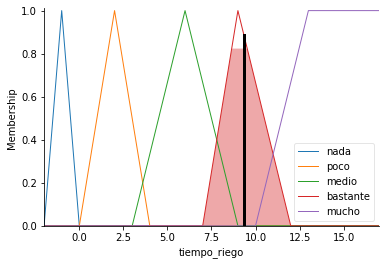

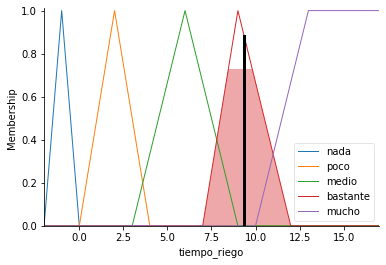

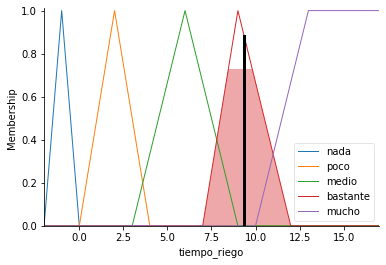

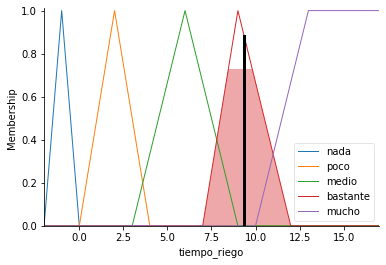

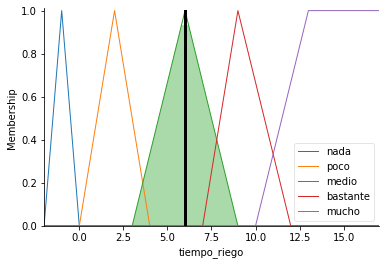

In [62]:
historial = HistorialRiego.objects.filter(codigo_sensor = 4)
for h in historial:
    
    try:
        tipping.input['humedad_suelo'] = float(h.valor_humed_suelo)
        tipping.compute()
        print("Fecha de Registro: ", h.fecha_riego)
        print("Humedad de Suelo: ",h.valor_humed_suelo, "Tiempo de Riego: ", tipping.output['tiempo_riego'])
        tiempo_riego.view(sim=tipping)
        
    except:
        pass
    